# You must translate, then apply your transfortmation and then invert the translation

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
grey = r'albert-einstein_gray.jpg'
colour = r'tulips.jpg'
I_grey = cv2.imread(grey, cv2.IMREAD_GRAYSCALE)
I_BGR = cv2.imread(colour)
numRows = I_grey.shape[0]
numCols = I_grey.shape[1]

In [21]:
# interpolating pixel intensity
def f_bilinearInterpolate(r,c,I):  # function which takes row, colum and source image
    lc = int(c)   # left colum from point, int rounds down to left
    rc = lc + 1   # right colum from point
    wr = c - lc   # weighting for the right colum
    wl = rc - c
    tr = int(r)   # top row
    br = tr + 1   # bottom row
    wt = br - r
    wb = r - tr
    if tr >= 0 and br < I.shape[0] and lc >=0 and rc < I.shape[1]:
        a = wl*I[tr,lc] + wr*I[tr,rc] # intensity of interpolated top row
        b = wl*I[br,lc] + wr*I[br,rc] # intensity of interpolated bottom row
        g = wt*a + wb*b   # intensity of the second interpolation
        return np.uint8(g)
    else: 
        return 0

In [23]:
def f_getExtentsAffine(T,I_grey): # receives transformation matrix and source image
    rMax = I_grey.shape[0]
    cMax = I_grey.shape[1]
    coords = np.array([[0,0,1],[0,cMax-1,1],[rMax-1,0,1],[rMax-1,cMax-1,1]])
    A_dash = T.dot(coords.T)
    mins = A_dash.min(axis=1)
    maxs = A_dash.max(axis=1)
    minR = np.int64(np.floor(mins[0]))
    minC = np.int64(np.floor(mins[1]))
    maxR = np.int64(np.ceil(maxs[0]))
    maxC = np.int64(np.ceil(maxs[1]))
    H,W = maxR-minR+1,maxC-minC+1
    return minR,minC,maxR,maxC,H,W

In [25]:
def f_transformAffine(T,I_grey):
    rMax,cMax = I_grey.shape[0],I_grey.shape[1]
    minR,minC,maxR,maxC,H,W = f_getExtentsAffine(T,I_grey)
    I2 = np.zeros((H,W), dtype = 'uint8')
    Tinv = np.linalg.inv(T)
    for new_i in range(minR,maxR):
        for new_j in range(minC,maxC):
            p_dash = np.array([new_i,new_j,1])
            p = Tinv.dot(p_dash)
            i, j = p[0], p[1]
            if i < 0 or i >= numRows or j < 0 or j >= numCols:
                pass
            else:
                g = f_bilinearInterpolate(i,j,I_grey)
                I2[new_i-minR,new_j-minC] = g
    return I2

In [27]:
# rotate 30 degrees about (300,400)
a = 30
cosa = np.cos(np.deg2rad(a))
sina = np.sin(np.deg2rad(a))
R = np.array([[cosa,-sina,0],[sina,cosa,0],[0,0,1]]) # rotation matrix
T = np.array([[1,0,-300],[0,1,-400],[0,0,1]]) # translation
A = np.linalg.inv(T).dot(R).dot(T) # transformation matrix

array([[  0.8660254 ,  -0.5       , 240.19237886],
       [  0.5       ,   0.8660254 , -96.41016151],
       [  0.        ,   0.        ,   1.        ]])

In [31]:
I2 = f_transformAffine(A,I_grey)

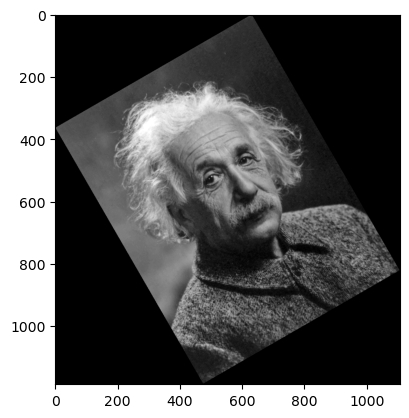

In [32]:
plt.imshow(I2,cmap = 'gray')

### Other matrix combinations

In [38]:
a = 30
cosa = np.cos(np.deg2rad(a))
sina = np.sin(np.deg2rad(a))
R = np.array([[cosa,-sina,0],[sina,cosa,0],[0,0,1]]) # rotation matrix
T = np.array([[1,0,-300],[0,1,-400],[0,0,1]]) # translation
Sh = np.array([[1,0.5,0],[0,1,0],[0,0,1]]) # shear
S = np.array([[1.3,0,0],[0,0.7,0],[0,0,1]]) # scale
A = np.linalg.inv(T).dot(Sh).dot(R).dot(S).dot(T) # transformation matrix

In [40]:
I2 = f_transformAffine(A,I_grey)

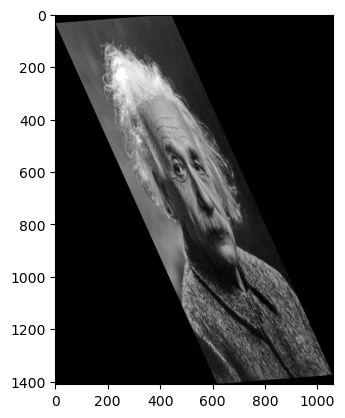

In [41]:
plt.imshow(I2,cmap = 'gray')